**Лабораторная работа №3**

Студент: Пешков М.Ю. Группа: М8O-109м-23

**EM-algorithm**

**Gaussian Mixture Model**

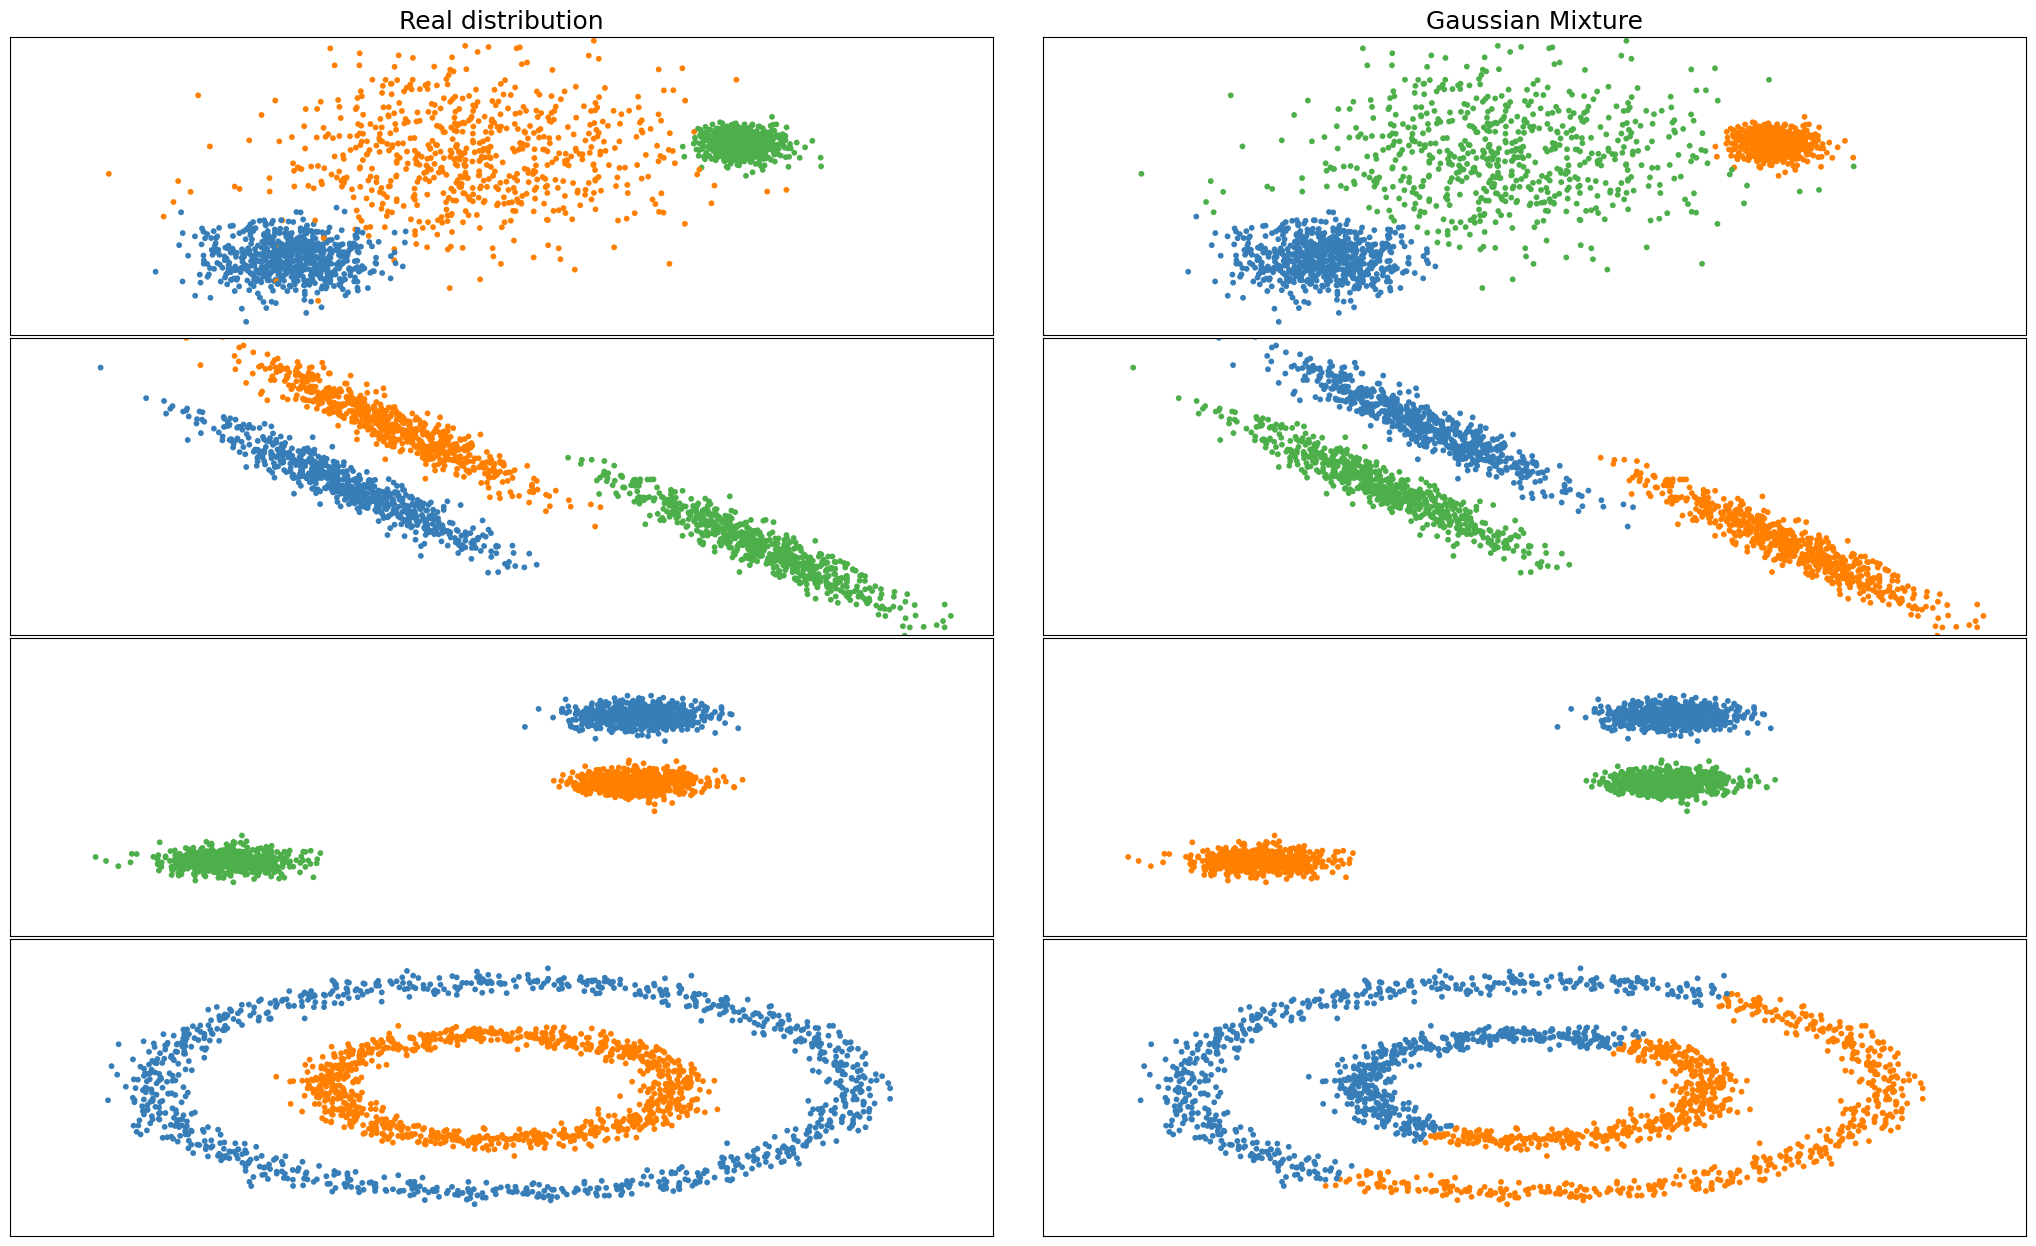

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
np.random.seed(42)

# Создаем datasets с использованием стандартных sklearn.datasets
n_samples = 2000
random_state = 170
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# Создаем анизатропно разделенные данные
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Выставляем параметры для matplotlib.pyplot
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
plot_num = 1
defaul_n = 3

# Варьируем значение количества классов в зависимости от данных, ведь для нас это гиперпараметр
datasets = [
   (varied, defaul_n),
   (aniso, defaul_n),
   (blobs, defaul_n),
   (noisy_circles, 2)]
for i_dataset, (dataset, n_cluster) in enumerate(datasets):
   X, y = dataset

   # Нормализация данных
   X = StandardScaler().fit_transform(X)

   # Непосредственно наш алгоритм - Gaussian Mixture
   gmm = mixture.GaussianMixture(n_components=n_cluster, covariance_type='full')

   clustering_algorithms = {
       'Real distribution': None,
       'Gaussian Mixture': gmm
    }
   for name, algorithm in clustering_algorithms.items():

        # Этап обучения
        if algorithm is not None:
            algorithm.fit(X)

        # Применяем алгоритм
        y_pred = y if algorithm is None else algorithm.predict(X)

        # Рисуем результаты
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a']), int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.show()

Сравнение Gaussian Mixture с k-means более показательно (различия в распределении данных).